## jupyter输出图片

在默认情况下，jupyter在使用matplotlib进行绘图的时候，会把图片显示在当前命令之后，但有时候会遇到无法显示的问题：`backend_inline which is a non-GUI backend, so cannot show the figure`。由于我使用的ssh转发连接服务器中的内核，因此在输出图片的时候，可以选择X11转发出图片。但是在网上看了一堆教程之后，发现`x11`的调用是在xshell中设置好的，我在服务器里使用screen将jupyter挂起之后，由于jupyter无法通过xshell调用相应的x11，所以每次画图就会导致内核重启一次。
正确的做法： 在xshell中启动jupyter后，就不再使用screen挂起了,并且画图时声明matplotlib使用的后端

```python
import matplotlib
matplotlib.use('Qt5Agg')
##如果想换在jupyter中显示图片
%matplotlib inline

```


## 散点图

#### 参考

1. [密度散点图](https://blog.csdn.net/ch206265/article/details/106807218?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase)
2. vstack堆叠函数https://blog.csdn.net/csdn15698845876/article/details/73380803


c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()
c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


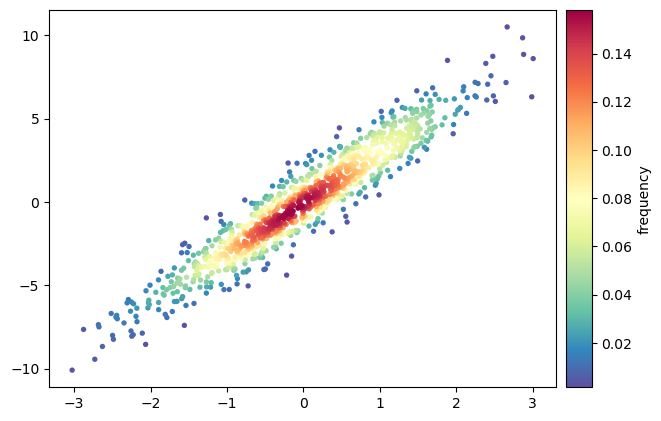

In [5]:
import  numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
%pylab
x = np.random.normal(size=1000)
y = x *3+ np.random.normal(size=1000)
xy = np.vstack([x,y]) ##将数组变成矩阵
z = gaussian_kde(xy)(xy) ##高斯分布估计每个位置的密度值
idx = z.argsort() ##对估计密度进行排序，返回对应索引
x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots(figsize=(7,5),dpi=100)
  
scatter = ax.scatter(x,y,marker='o',c=z,edgecolors='',s=15,label='LST'
                     ,cmap='Spectral_r')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax, label='frequency')
fig.show()

#### 绘制一维数据密度图
##### 参考
1. https://zhidao.baidu.com/question/323950122.html



In [2]:
import pandas as pd
import math
TADdata=pd.read_table("/data/cotton/zhenpingliu/HiC/mjwang/Gb379_5D_HiC_TAD/50000_blocks.bedpe",
                      header=0,
                     sep="\t")
TADdata.head()
TADlength=TADdata['x2']-TADdata['x1']
TADlength=TADlength[1::]
x=np.sqrt(((TADlength+np.random.rand()*1000).values))
average=np.average(TADlength.values)
y=np.sqrt(((TADlength+np.random.rand()*1000).values))
xy = np.vstack([x,y]) ##将数组变成矩阵
z = gaussian_kde(xy)(xy) ##高斯分布估计每个位置的密度值
idx = z.argsort() ##对估计密度进行排序，返回对应索引
x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots(figsize=(7,5),dpi=100)
  
scatter = ax.scatter(x,y,marker='o',c=z,edgecolors='',s=15,label='LST'
                     ,cmap='Spectral_r')
#####添加注释得再图例之前############
ticks=plt.xticks()[0] ##获取坐标轴刻度信息
plt.xticks(ticks,labels=['{:.0f}K'.format(i*i/1000) for i in ticks])
plt.yticks([])
location=math.sqrt(np.average(TADlength))
plt.annotate(r'Average length: '+'{:.2f}'.format(np.average(TADlength)/1000)+"K",
             size=15,
             xy=(location,location),
             xytext=(location,location+100),
             arrowprops=dict(facecolor='blue',arrowstyle='->')) 
plt.text(ticks[0]+100,ticks[-2],'sample:'+"10K")
print(len(TADlength))
plt.text(ticks[0]+100,ticks[-3],'Count:{}'.format(len(TADlength)))
#######添加图例#############
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax, label='frequency')
fig.show()

1065


<ipython-input-2-8eea332293d6>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  scatter = ax.scatter(x,y,marker='o',c=z,edgecolors='',s=15,label='LST'
<ipython-input-2-8eea332293d6>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [46]:
a=[{},{}]
a.remove({})
a
a.remove({})
a

[]